In [2]:
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [12]:
df=pd.read_csv(r"Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.duplicated().sum()

0

In [15]:
df.drop(columns=['Serial No.'],inplace=True)

In [16]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [20]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
history=model.fit(X_train_scaled,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 2s 29ms/step - loss: 0.1386 - val_loss: 0.1087
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0973 - val_loss: 0.0734
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0667 - val_loss: 0.0503
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0467 - val_loss: 0.0369
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0348 - val_loss: 0.0308
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0283 - val_loss: 0.0291
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.0292
Epoch 8/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0248 - val_loss: 0.0295
Epoch 9/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0240 - val_loss: 0.0287
Epoch 10/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0233 - val_loss: 0.0276


In [26]:
y_pred=model.predict(X_test_scaled)

3/3 [==============================] - 0s 7ms/step


In [28]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.2846422811233549

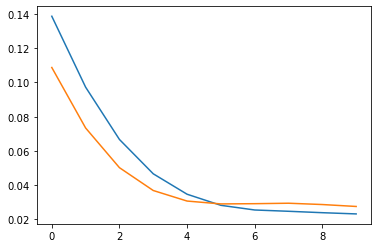

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])